In [5]:
import pandas as pd
import numpy as np
import csv
import pickle
from os.path import exists
import matplotlib.pyplot as plt


In [7]:
psydf = pd.read_csv('/content/drive/MyDrive/AML Final Project/psychology.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
psydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46279 entries, 0 to 46278
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   University         46279 non-null  object 
 1   Program            46279 non-null  object 
 2   Degree             46279 non-null  object 
 3   Entrance Semester  46279 non-null  object 
 4   Decision           46256 non-null  object 
 5   Decision Date      46279 non-null  object 
 6   GPA                7821 non-null   float64
 7   GRE Verbal         8316 non-null   float64
 8   GRE Quantitive     8316 non-null   float64
 9   GRE Writing        8316 non-null   float64
 10  GRE Subject        1974 non-null   float64
 11  Status             37022 non-null  object 
 12  Date Added         46279 non-null  object 
 13  Notes              30853 non-null  object 
dtypes: float64(5), object(9)
memory usage: 4.9+ MB


In [9]:
psydf.Decision.value_counts()

Interview      14025
Rejected       13526
Accepted       10773
Other           4482
Wait listed     3450
Name: Decision, dtype: int64

In [ ]:
psydf

,University,Program,Degree,Entrance Semester,Decision,Decision Date,GPA,GRE Verbal,GRE Quantitive,GRE Writing,GRE Subject,Status,Date Added,Notes
0,Colorado State University - Fort Collins,Counseling Psychology,PhD,F21,Other,8 Jan 2021,NaN,NaN,NaN,NaN,NaN,NaN,8 Jan 2021,To the poster below- I have not heard anything...
1,University Of Nebraska–Lincoln,Clinical Psychology,PhD,F21,Interview,8 Jan 2021,NaN,NaN,NaN,NaN,NaN,A,8 Jan 2021,"Interview invite via two separate emails, one ..."
2,University Of Kansas,Clinical Psychology,PhD,F21,Interview,8 Jan 2021,NaN,NaN,NaN,NaN,NaN,A,8 Jan 2021,Invitation for pre-interview from PI (JG)
3,Georgia Southern University,Clinical Psychology,PsyD,F21,Interview,8 Jan 2021,NaN,NaN,NaN,NaN,NaN,A,8 Jan 2021,invitation to interview from director
4,Georgia Southern University,Clinical Psychology,PsyD,F21,Interview,8 Jan 2021,3.79,154.0,162.0,0.0,NaN,A,8 Jan 2021,Received a personalized email from the Direc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46274,Binghamton University,Clinical Psychology,,?,Interview,28 Jan 2006,NaN,NaN,NaN,NaN,NaN,?,11 Feb 2006,NaN
46275,CUNY Graduate Center,Psychology (Social/Personality),,?,Accepted,18 Jan 2006,NaN,NaN,NaN,NaN,NaN,?,11 Feb 2006,NaN
46276,"University Of Michigan, Ann Arbor",Clinical Psychology,PhD,?,Rejected,9 Feb 2006,NaN,NaN,NaN,NaN,NaN,?,10 Feb 2006,NaN
46277,Rosalind Franklin University of Medicine And S...,Clinical Psychology,PhD,?,Interview,8 Feb 2006,NaN,NaN,NaN,NaN,NaN,?,10 Feb 2006,NaN


In [10]:
from datetime import datetime

for i in range(len(psydf)):
  if type(psydf['Date Added'][i])!= str:
    continue
  if len(psydf['Date Added'][i]) == 10:
    tem = '0'+psydf['Date Added'][i]
  else:
    tem = psydf['Date Added'][i]
  psydf.loc[i, 'Date'] = datetime.strptime(tem, '%d %b %Y')

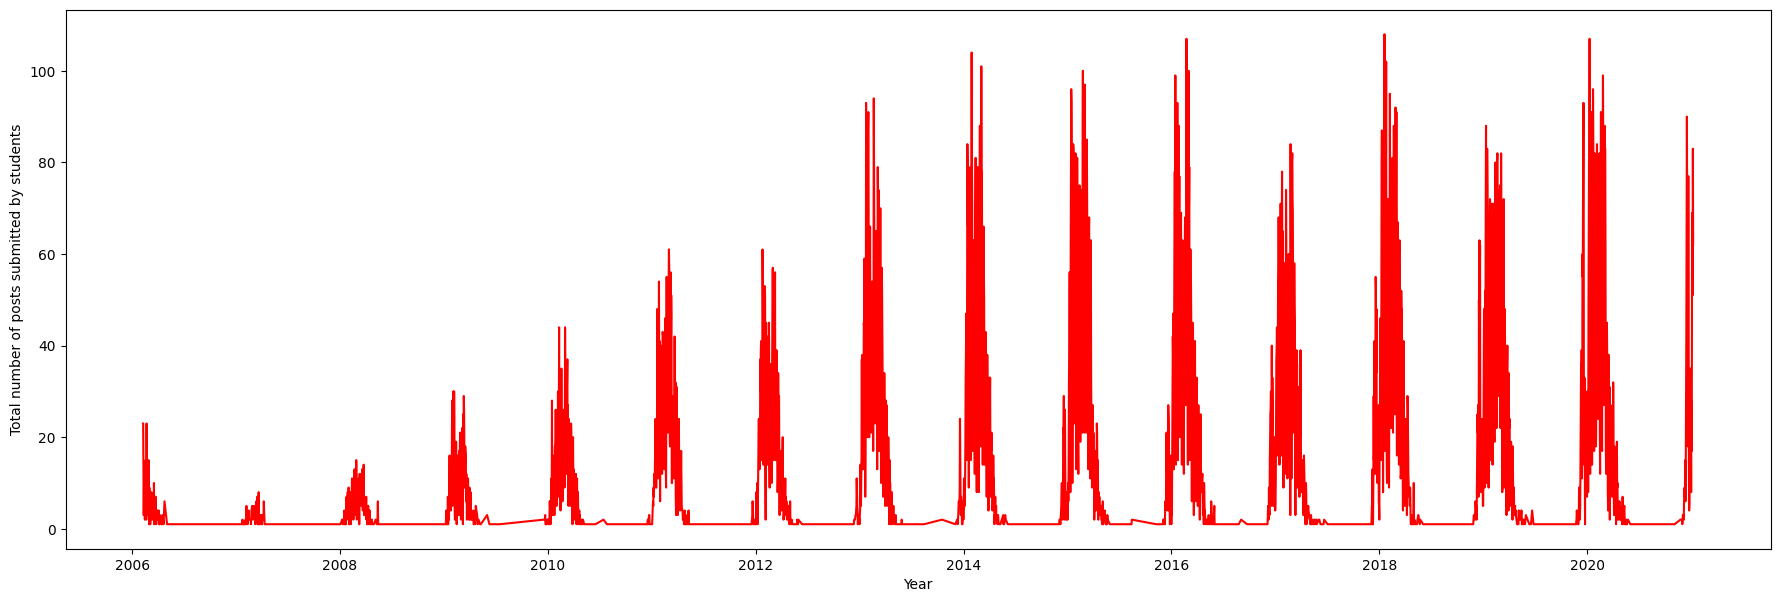

In [29]:
fig = plt.figure(figsize = (22,7))
plt.plot(psydf.groupby('Date').size(), c='r')
plt.xlabel('Year')
plt.ylabel('Total number of posts submitted by students')
plt.show()


In [12]:
show = psydf.groupby('Date').size()
more = show[show>5]

In [13]:
more_month = [i.month for i in more.index]
print([[x,more_month.count(x)] for x in set(more_month)])

[[1, 328], [2, 361], [3, 376], [4, 176], [5, 6], [12, 144]]


In [14]:
psydf[psydf['Entrance Semester']=='F20'].groupby('Date').count()
# The first data about F20 added in 2019-10-21.

,University,Program,Degree,Entrance Semester,Decision,Decision Date,GPA,GRE Verbal,GRE Quantitive,GRE Writing,GRE Subject,Status,Date Added,Notes
Date,,,,,,,,,,,,,,
2019-10-21,1,1,1,1,1,1,0,0,0,0,0,1,1,1
2019-11-09,1,1,1,1,1,1,0,0,0,0,0,0,1,1
2019-11-23,1,1,1,1,1,1,0,0,0,0,0,1,1,0
2019-11-25,2,2,2,2,2,2,0,0,0,0,0,2,2,0
2019-11-26,4,4,4,4,4,4,0,0,0,0,0,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-15,2,2,2,2,2,2,0,0,0,0,0,1,2,1
2020-12-16,1,1,1,1,1,1,0,0,0,0,0,1,1,1
2020-12-22,4,4,4,4,4,4,0,0,0,0,0,4,4,1


*2006*/02/28, 2019/10/21, 2021/01/08

In [15]:
train_all, test_all = psydf[psydf.Date < datetime(2019, 10, 21)].groupby('Date').size(), psydf[psydf.Date >= datetime(2019, 10, 21)].groupby('Date').size()
train_type, test_type = psydf[psydf.Date < datetime(2019, 10, 21)].groupby(['Decision','Date']).size(), psydf[psydf.Date >= datetime(2019, 10, 21)].groupby(['Decision','Date']).size()
train_int, test_int = train_type['Interview'], test_type['Interview']
train_rej, test_rej = train_type['Rejected'], test_type['Rejected']
train_acc, test_acc = train_type['Accepted'], test_type['Accepted']
train_wai, test_wai = train_type['Wait listed'], test_type['Wait listed']

In [32]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import r2_score
from prophet.plot import add_changepoints_to_plot

def nfl_month(ds):
  date = pd.to_datetime(ds)
  if date.month in [12,1,2,3,4]:
      return 1
  else:
      return 0

def is_nfl_season(ds):
    date = pd.to_datetime(ds)
    return date.month in [4,5,12]

#df['on_season'] = df['ds'].apply(is_nfl_season)
#df['off_season'] = ~df['ds'].apply(is_nfl_season)



def prediction(data_train, data_test, seasonality_mode ='multiplicative', pred = 'D'):
  #seasonality_mode ='additive' (default) or 'multiplicative'
  df_train = pd.DataFrame({'ds': data_train.index, 'y': data_train.values})

  
  df_train['nfl_month'] = df_train['ds'].apply(nfl_month)
  change = []
  for i in range(2006,2020):
    tem = str(i)+'-12-01'
    if tem in df_train.ds:
      change.append(tem)
    tem = str(i)+'-04-30'
    if tem in df_train.ds:
      change.append(tem)

  m = Prophet(interval_width = 0.95, changepoint_prior_scale=0.2, changepoint_range=0.9, daily_seasonality=False, 
              changepoints=change,seasonality_mode = seasonality_mode, weekly_seasonality= False)
  m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
  m.add_regressor('nfl_month')

  m.fit(df_train)

  if pred == 'D':
    future = m.make_future_dataframe(periods=(data_test.index[-1]-data_train.index[-1]).days,freq='D')
  elif pred == 'M':
    future = m.make_future_dataframe(periods=(data_test.index[-1]-data_train.index[-1]).days//30,freq='M')
  else:
    future = m.make_future_dataframe(periods=(data_test.index[-1]-data_train.index[-1]).days//7,freq='W')
  
  #future = pd.DataFrame({'ds': data_test.index, 'y': data_test.values})
  future['nfl_month'] = future['ds'].apply(nfl_month)


  fcst = m.predict(future)
  fig = m.plot(fcst, ylabel="Number of posts")
  #a = add_changepoints_to_plot(fig.gca(), m, fcst)
  plot_plotly(m, fcst)
  #print("R2 score : %.2f" % r2_score(data_test.values,fcst[-len(data_test):].yhat))
  return m, fcst, fig


def plotin(data_test, fcst, freq = 'D'):
  #a = pd.DataFrame(data_test)
  new_date_range = pd.date_range(start="2019-10-21", end=data_test.index[-1], freq=freq)
  a_len = len(new_date_range)
  #a = a.reindex(new_date_range, fill_value=0)
  #a_len = len(a)
  fig = plt.figure(figsize = (15,7))
  #plt.scatter(new_date_range, a[0], c='b')
  plt.scatter(data_test.index, data_test.values, c='g', label='Truth')
  plt.fill_between(new_date_range, fcst[-a_len:].yhat_lower, fcst[-a_len:].yhat_upper, alpha=.5, color='pink', label='Prediction')
  plt.xlabel('Time')
  plt.ylabel('Total number of post created by students ')
  plt.legend()
  plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/5aej3efx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/1d3gftl9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97633', 'data', 'file=/tmp/tmp67rukbya/5aej3efx.json', 'init=/tmp/tmp67rukbya/1d3gftl9.json', 'output', 'file=/tmp/tmp67rukbya/prophet_modelobk1j54r/prophet_model-20230426002825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


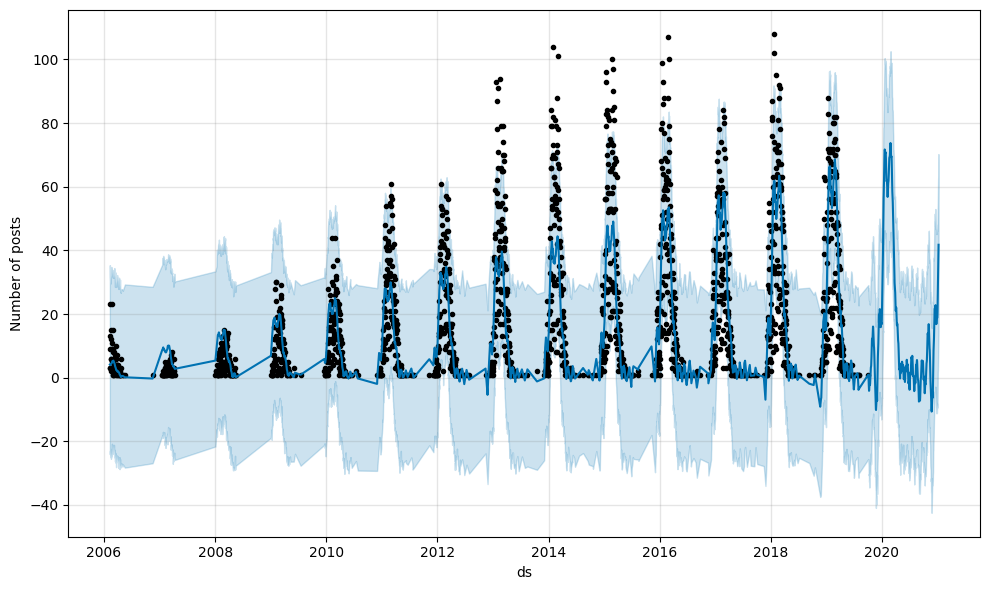

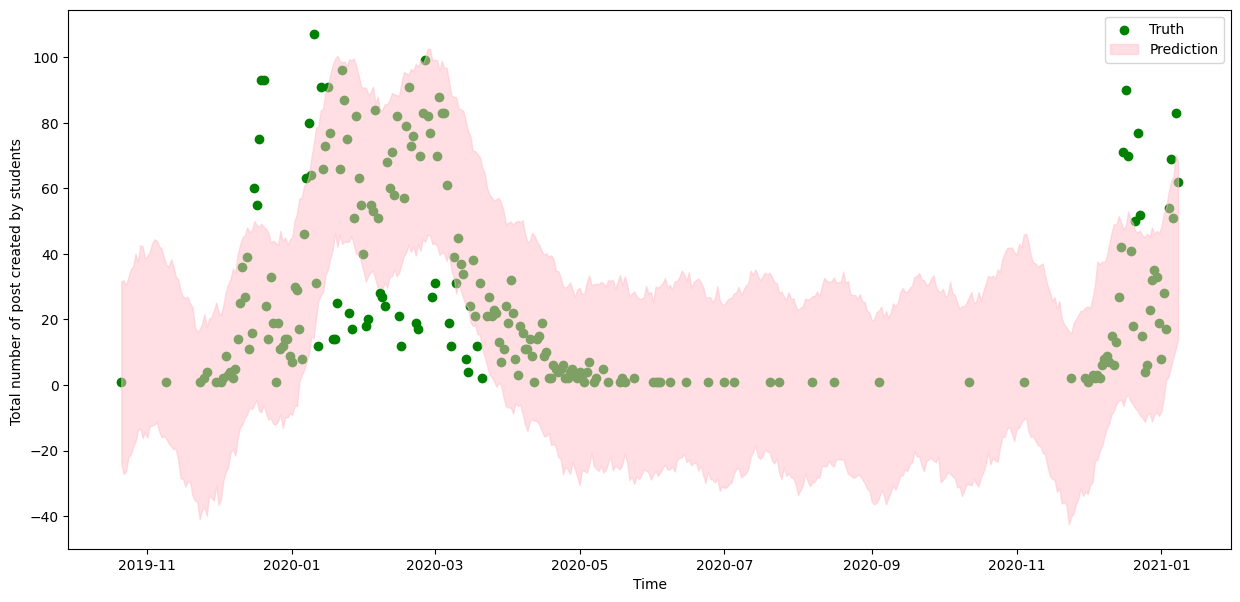

In [34]:
m_all, fcst_all, fig_all = prediction(train_all,test_all)
plotin(test_all, fcst_all)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/cokspz2_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/whn7_i0v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83256', 'data', 'file=/tmp/tmp67rukbya/cokspz2_.json', 'init=/tmp/tmp67rukbya/whn7_i0v.json', 'output', 'file=/tmp/tmp67rukbya/prophet_model2nygf1ls/prophet_model-20230426002823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


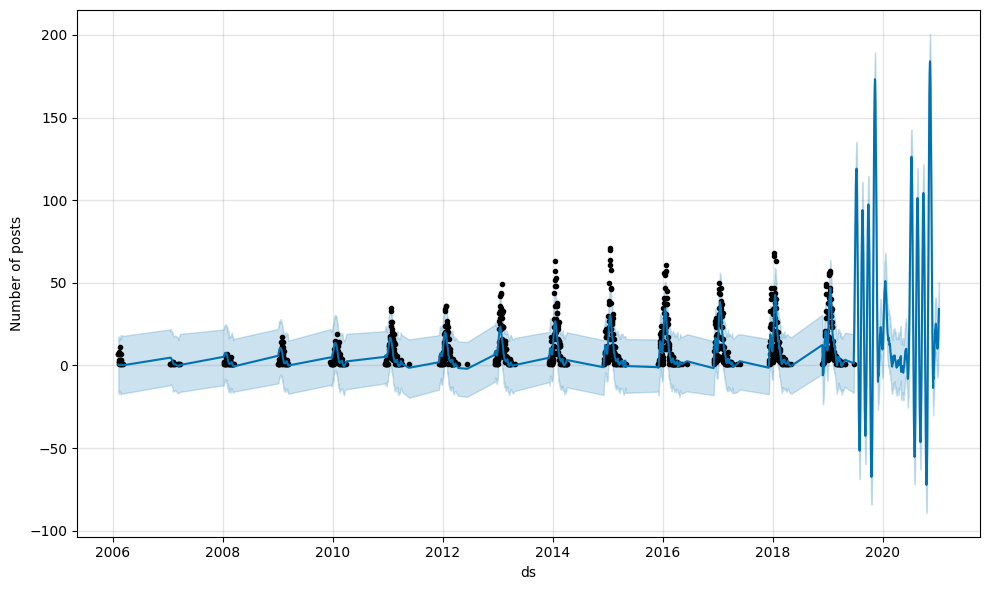

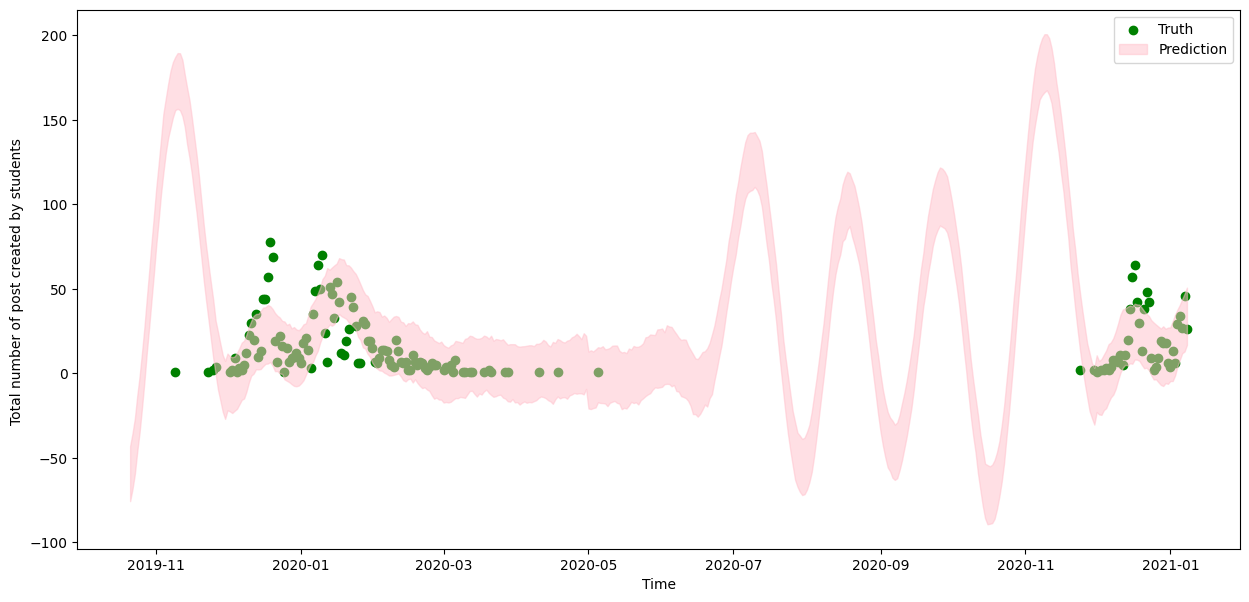

In [33]:
m_int, fcst_int, fig_int = prediction(train_int,test_int)
plotin(test_int, fcst_int)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/en8dclkp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/x5tqsnp9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60522', 'data', 'file=/tmp/tmp67rukbya/en8dclkp.json', 'init=/tmp/tmp67rukbya/x5tqsnp9.json', 'output', 'file=/tmp/tmp67rukbya/prophet_modelbxjayadm/prophet_model-20230426002900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:29:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:29:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


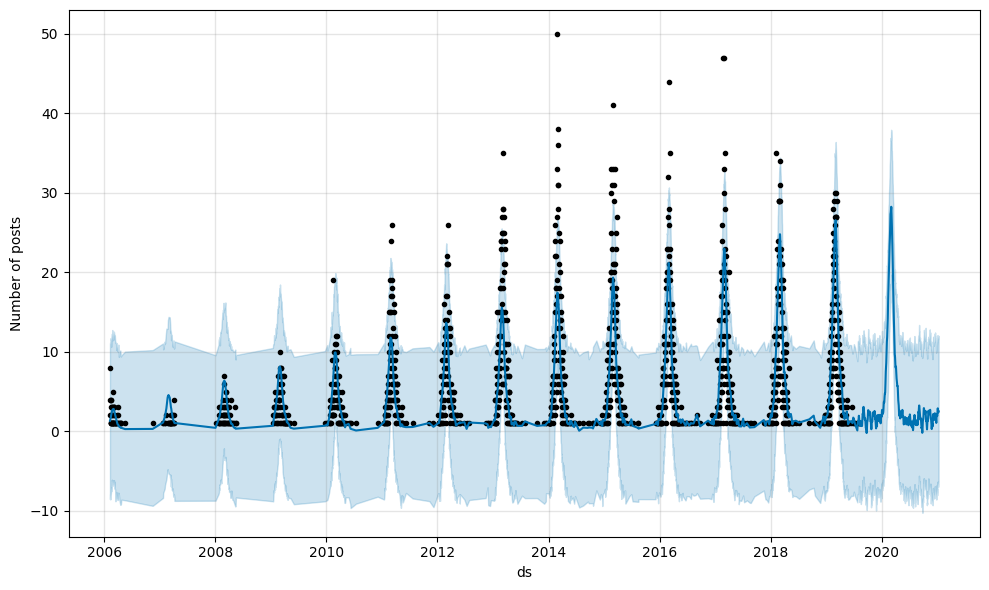

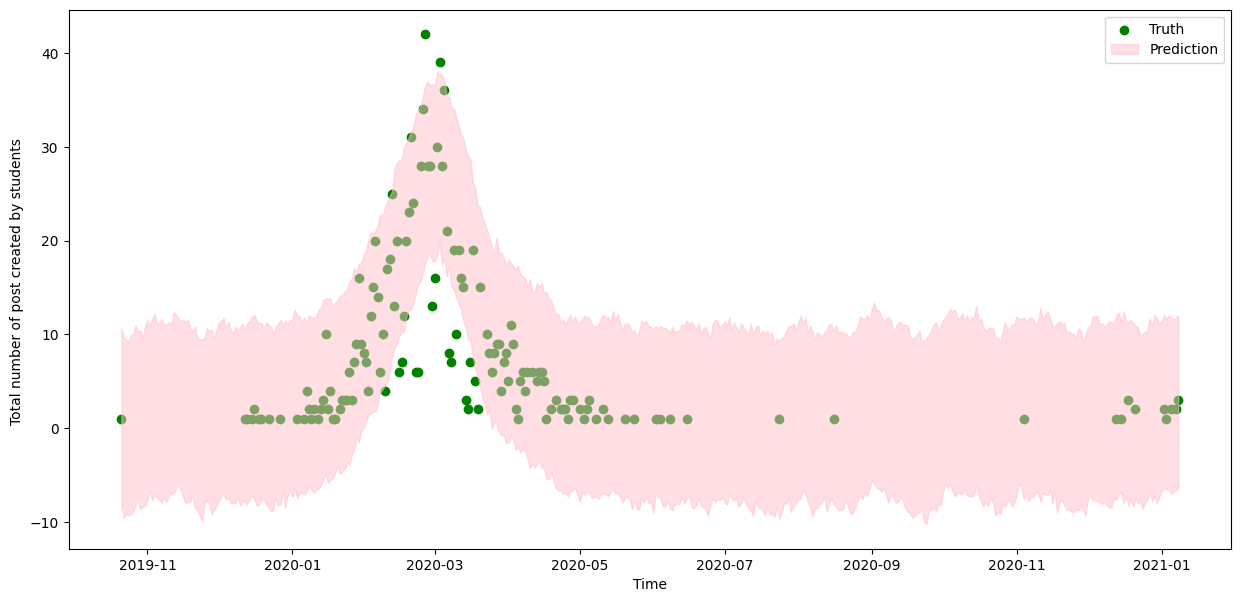

In [35]:
m_acc, fcst_acc, fig_acc = prediction(train_acc,test_acc)
plotin(test_acc,fcst_acc)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/qa81r_n_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/fp1eq8q_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90675', 'data', 'file=/tmp/tmp67rukbya/qa81r_n_.json', 'init=/tmp/tmp67rukbya/fp1eq8q_.json', 'output', 'file=/tmp/tmp67rukbya/prophet_models1vvx5d6/prophet_model-20230426002911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:29:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:29:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


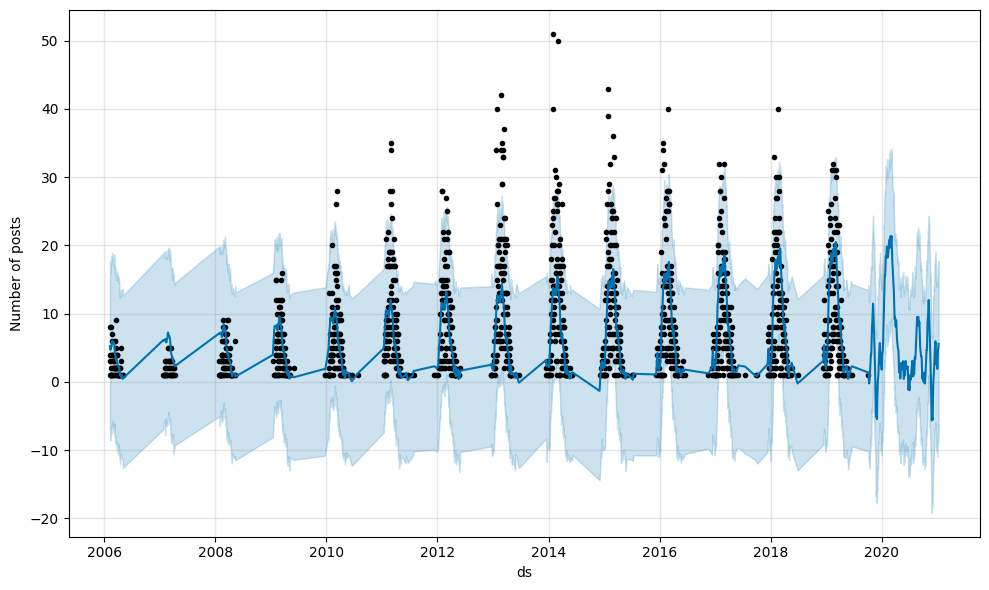

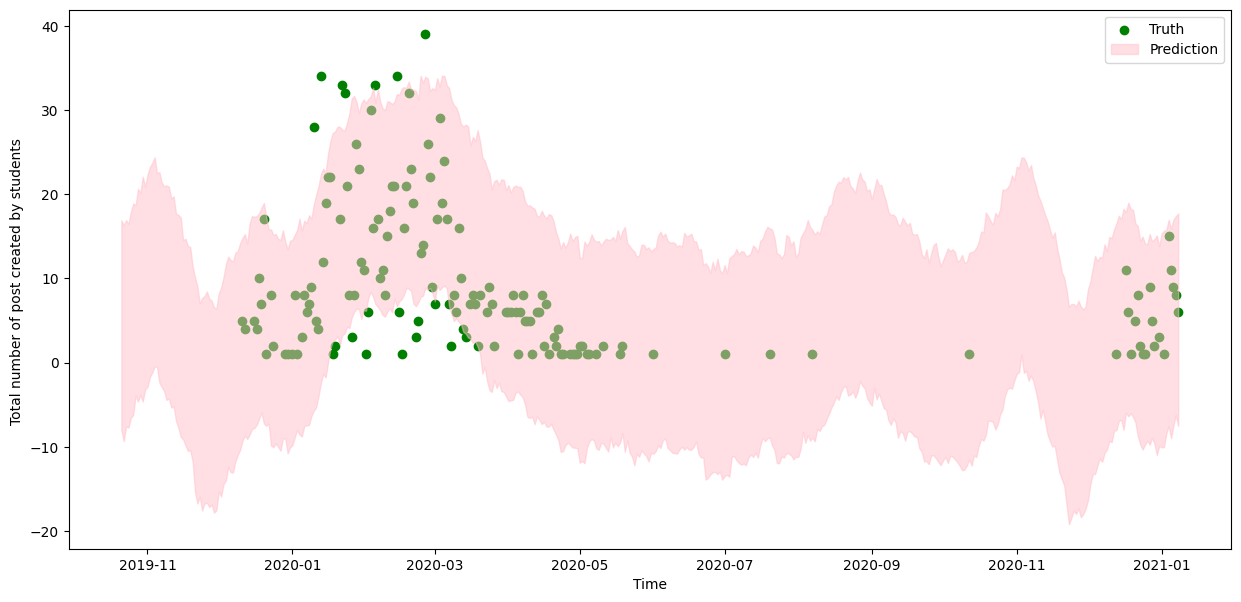

In [36]:
m_rej, fcst_rej, fig_rej = prediction(train_rej,test_rej)
plotin(test_rej,fcst_rej)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/nxt1cv49.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/s6ixfb9t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64463', 'data', 'file=/tmp/tmp67rukbya/nxt1cv49.json', 'init=/tmp/tmp67rukbya/s6ixfb9t.json', 'output', 'file=/tmp/tmp67rukbya/prophet_model4dt5gq0u/prophet_model-20230426002921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:29:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:29:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


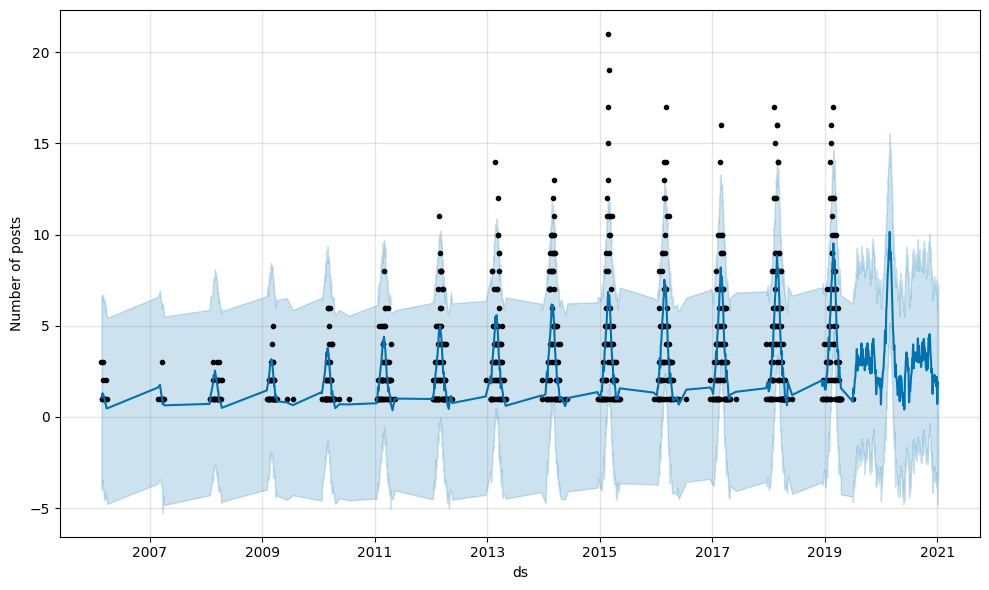

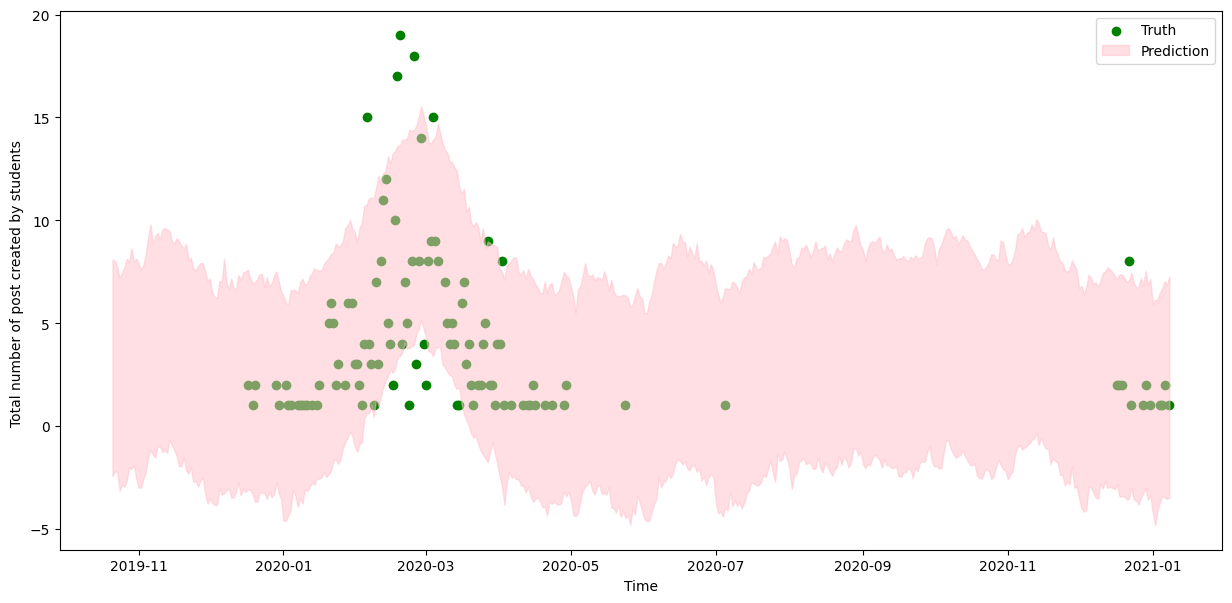

In [37]:
m_wai, fcst_wai, fig_wai = prediction(train_wai,test_wai)
plotin(test_wai,fcst_wai)

In [39]:
train_week, test_week = psydf[psydf.Date < datetime(2019, 10, 21)].groupby(pd.Grouper(key='Date', axis=0, freq='W')).size(), psydf[psydf.Date >= datetime(2019, 10, 21)].groupby(pd.Grouper(key='Date', axis=0, freq='W')).size()

DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/tfwambvl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/oy7z7_cy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77067', 'data', 'file=/tmp/tmp67rukbya/tfwambvl.json', 'init=/tmp/tmp67rukbya/oy7z7_cy.json', 'output', 'file=/tmp/tmp67rukbya/prophet_modelepkg9lww/prophet_model-20230426002938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:29:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:29:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


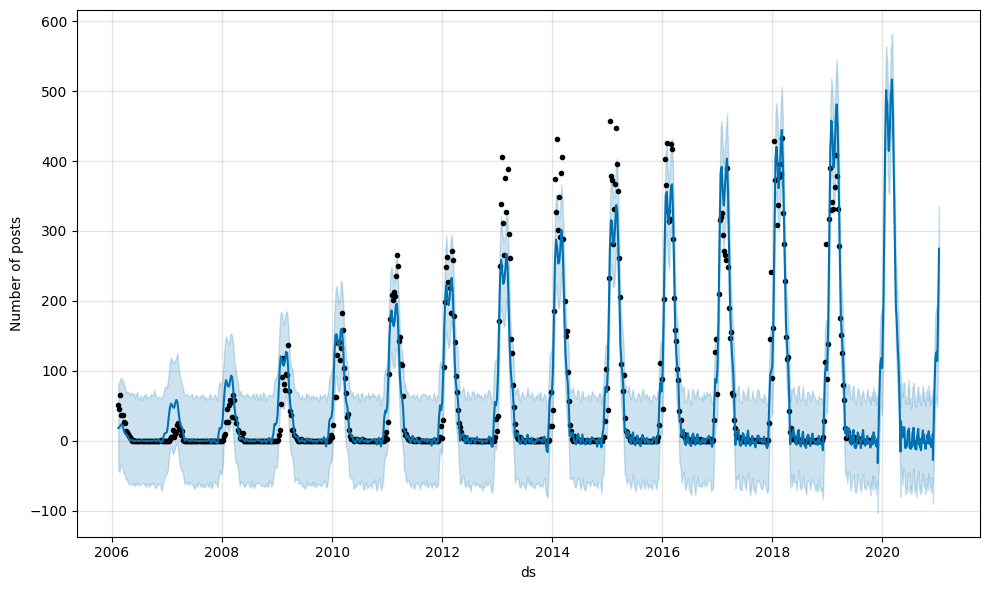

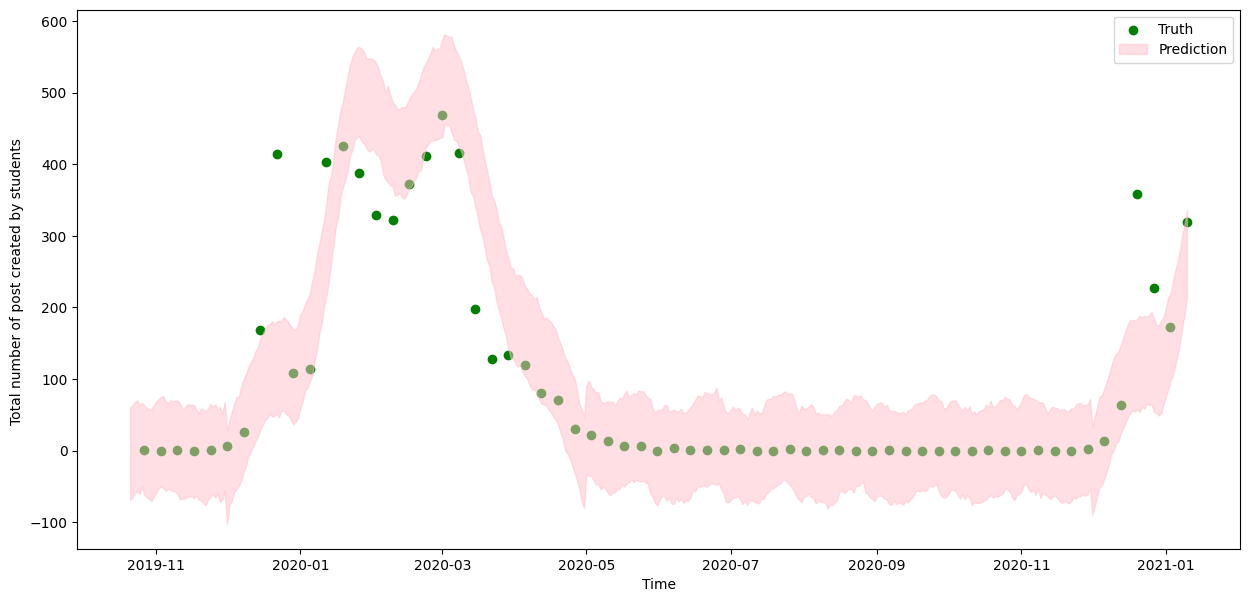

In [40]:
m_week, fcst_week, fig_week = prediction(train_week,test_week)
plotin(test_week,fcst_week)

In [ ]:
from prophet.diagnostics import cross_validation
cv_all_week = cross_validation(m_week,horizon = '365 days')
from prophet.diagnostics import performance_metrics
p_all_week = performance_metrics(cv_all_week)
p_all_week.head()

INFO:prophet:Making 20 forecasts with cutoffs between 2009-04-08 12:00:00 and 2018-10-06 00:00:00


  0%|          | 0/20 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2qtjv262/qbr62txu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2qtjv262/xmacwf4d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66609', 'data', 'file=/tmp/tmp2qtjv262/qbr62txu.json', 'init=/tmp/tmp2qtjv262/xmacwf4d.json', 'output', 'file=/tmp/tmp2qtjv262/prophet_model4zrm63ed/prophet_model-20221113050527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:05:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:05:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2qtjv262/zetv9zny.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2qtjv262/c5haz9tm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

,horizon,mse,rmse,mae,mdape,smape,coverage
0,36 days 12:00:00,233.067693,15.266555,8.663402,2.368514,1.256724,0.971154
1,37 days 00:00:00,233.106001,15.267809,8.681385,2.368514,1.256724,0.971154
2,37 days 12:00:00,195.349998,13.976766,7.929933,2.368514,1.272828,0.980769
3,38 days 00:00:00,195.750168,13.991075,7.943806,2.368514,1.277990,0.980769
4,38 days 12:00:00,127.918622,11.310112,7.203742,2.382135,1.291659,0.990385


In [43]:
train_type_w, test_type_w = psydf[psydf.Date < datetime(2019, 10, 21)].groupby(['Decision',pd.Grouper(key='Date', axis=0, freq='W')]).size(), psydf[psydf.Date >= datetime(2019, 10, 21)].groupby(['Decision',pd.Grouper(key='Date', axis=0, freq='W')]).size()
train_int_w, test_int_w = train_type_w['Interview'], test_type_w['Interview']
train_rej_w, test_rej_w = train_type_w['Rejected'], test_type_w['Rejected']
train_acc_w, test_acc_w = train_type_w['Accepted'], test_type_w['Accepted']
train_wai_w, test_wai_w = train_type_w['Wait listed'], test_type_w['Wait listed']

DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/64n66mgv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/r439mf63.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28614', 'data', 'file=/tmp/tmp67rukbya/64n66mgv.json', 'init=/tmp/tmp67rukbya/r439mf63.json', 'output', 'file=/tmp/tmp67rukbya/prophet_modelzptx5dhs/prophet_model-20230426002959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:29:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:29:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
00:29:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
ERROR:cmdstanpy:Chain [1] error: error during processing Communication error on send
DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/xcim_xh6.

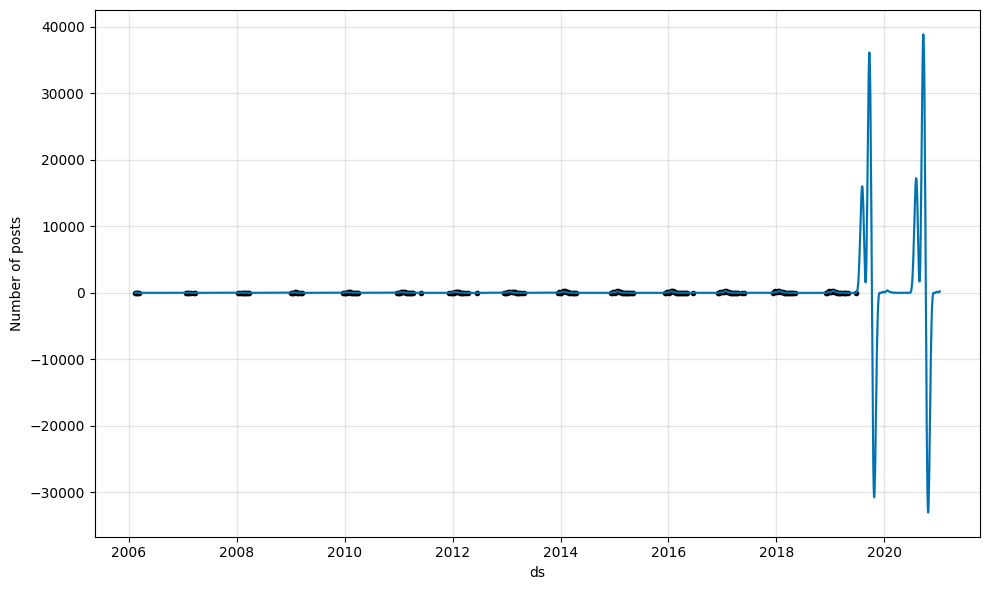

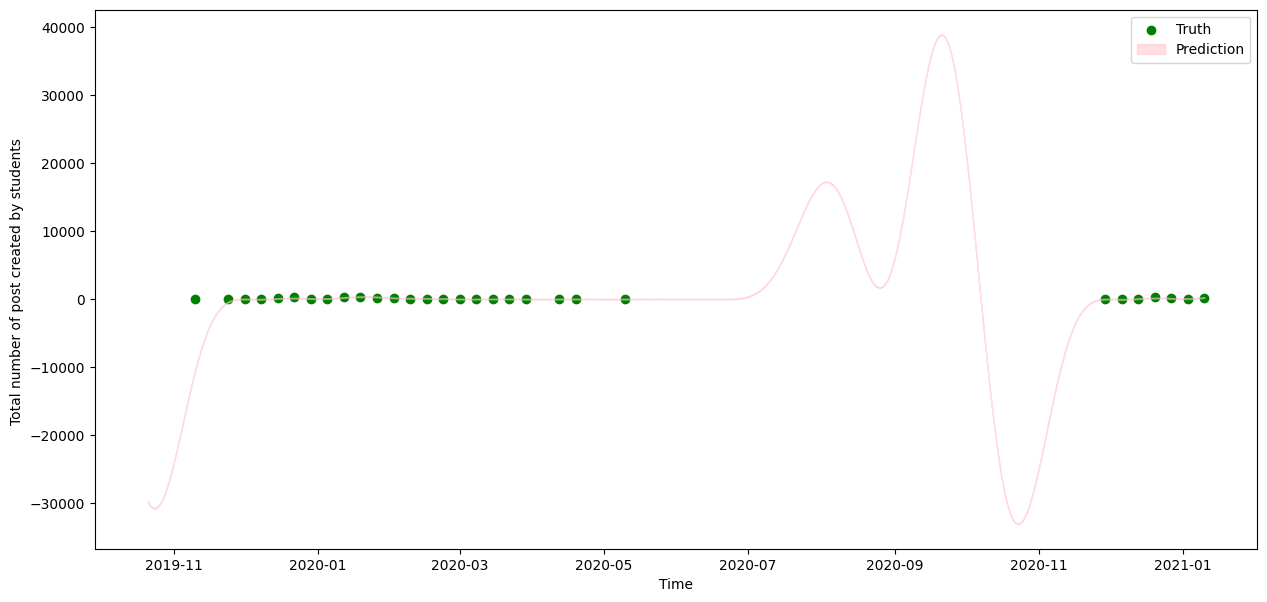

In [44]:
m_int_w, fcst_int_w, fig_int_w = prediction(train_int_w,test_int_w)
plotin(test_int_w, fcst_int_w)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/mqqzzcof.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/ek0ek7xc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86659', 'data', 'file=/tmp/tmp67rukbya/mqqzzcof.json', 'init=/tmp/tmp67rukbya/ek0ek7xc.json', 'output', 'file=/tmp/tmp67rukbya/prophet_modelssd8zzs5/prophet_model-20230426003013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:30:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:30:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


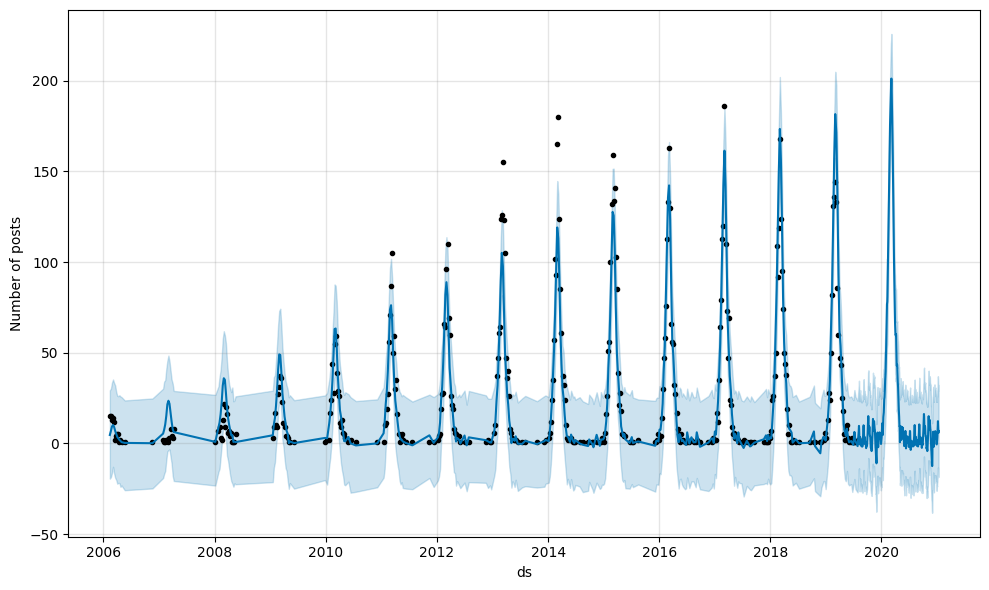

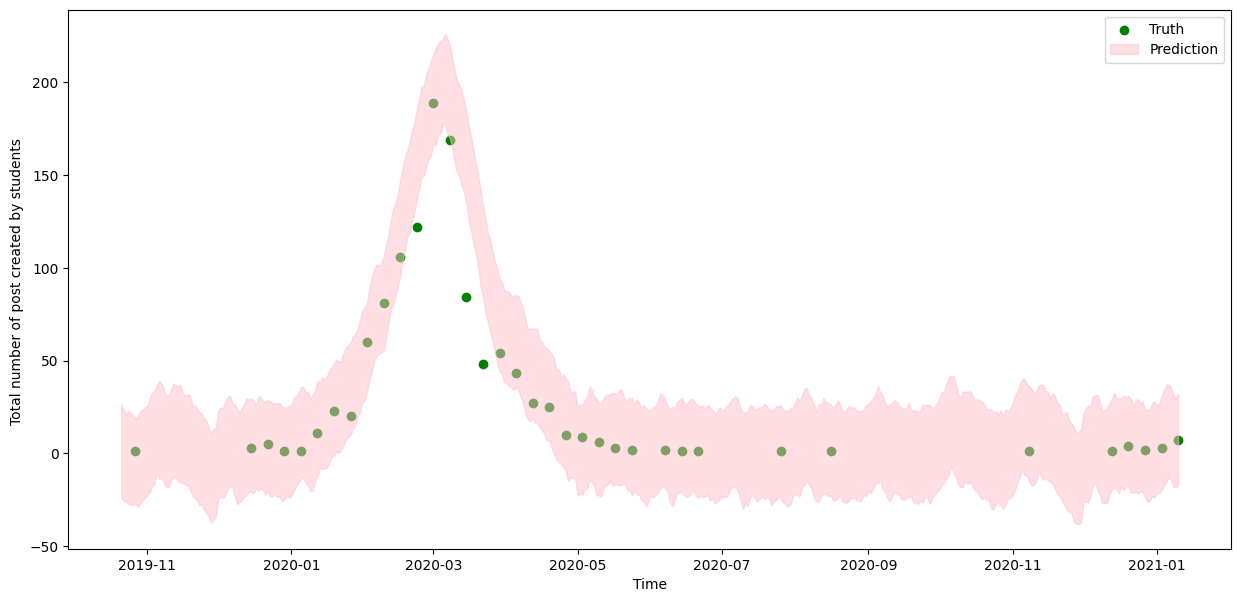

In [45]:
m_acc_w, fcst_acc_w, fig_acc_w = prediction(train_acc_w,test_acc_w)
plotin(test_acc_w, fcst_acc_w)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/uked4bcc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/fz5kw9v7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59253', 'data', 'file=/tmp/tmp67rukbya/uked4bcc.json', 'init=/tmp/tmp67rukbya/fz5kw9v7.json', 'output', 'file=/tmp/tmp67rukbya/prophet_modelagr1yx5z/prophet_model-20230426003023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:30:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:30:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


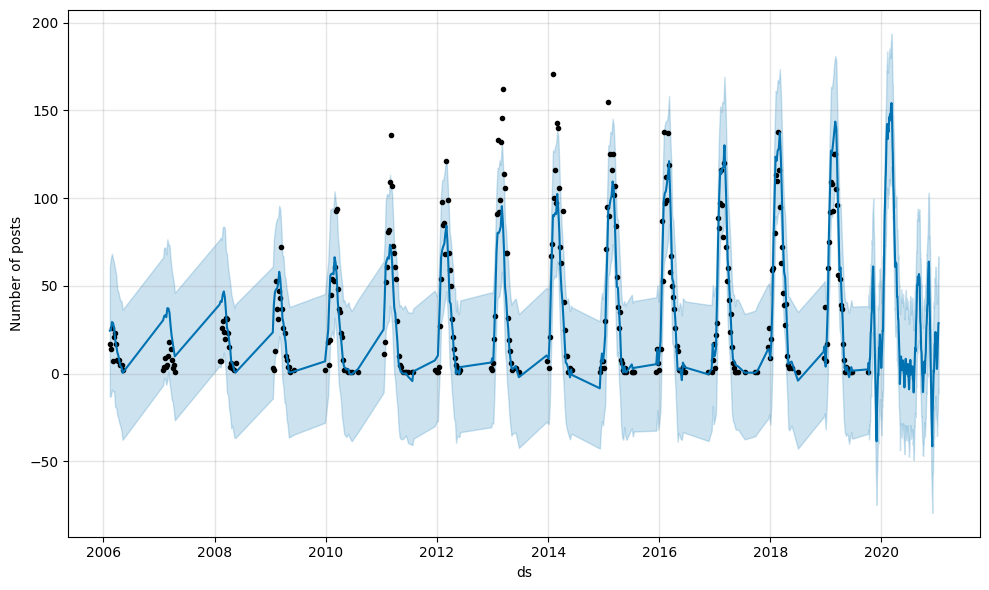

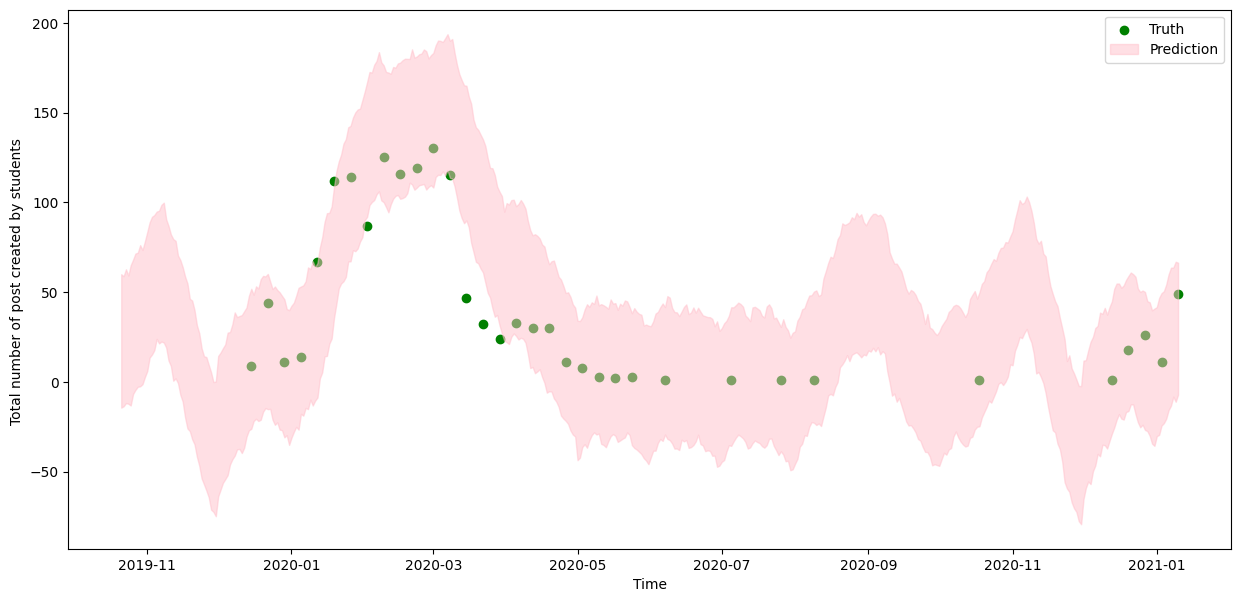

In [46]:
m_rej_w, fcst_rej_w, fig_rej_w = prediction(train_rej_w,test_rej_w)
plotin(test_rej_w, fcst_rej_w)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/w754nj7j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/jsgeo0r5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49884', 'data', 'file=/tmp/tmp67rukbya/w754nj7j.json', 'init=/tmp/tmp67rukbya/jsgeo0r5.json', 'output', 'file=/tmp/tmp67rukbya/prophet_modelcck9mx55/prophet_model-20230426003035.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:30:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:30:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


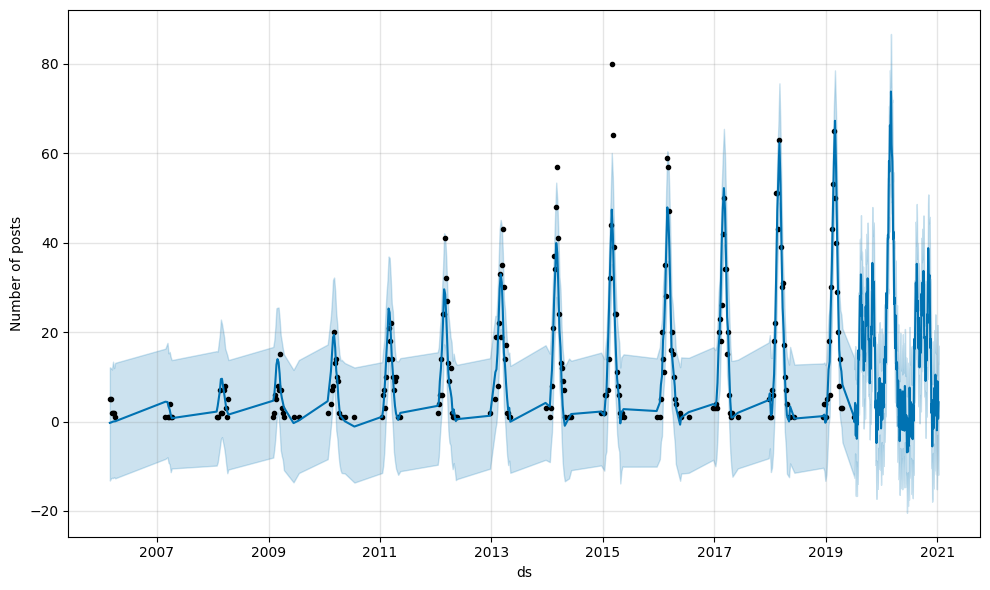

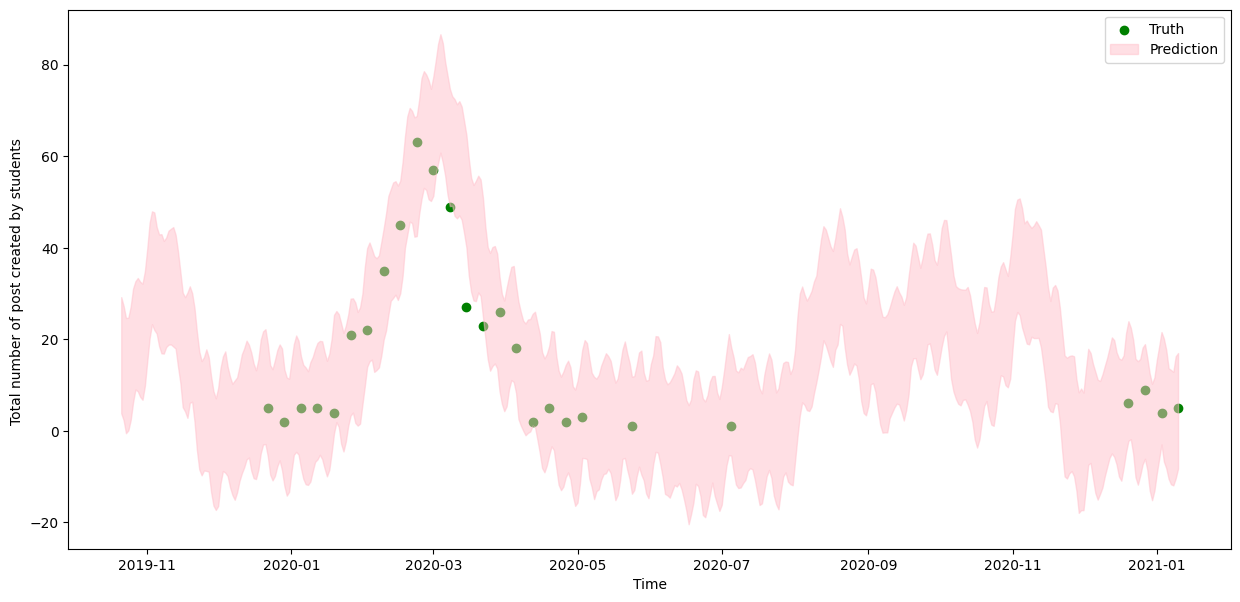

In [47]:
m_wai_w, fcst_wai_w, fig_wai_w = prediction(train_wai_w,test_wai_w)
plotin(test_wai_w, fcst_wai_w)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/0eiprqhp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/nzykwzm7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72803', 'data', 'file=/tmp/tmp67rukbya/0eiprqhp.json', 'init=/tmp/tmp67rukbya/nzykwzm7.json', 'output', 'file=/tmp/tmp67rukbya/prophet_modelww6_3gwc/prophet_model-20230426003046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:30:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:30:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
00:30:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
ERROR:cmdstanpy:Chain [1] error: error during processing Communication error on send
DEBUG:cmdstanpy:input tempfile: /tmp/tmp67rukbya/d8n4uk8f.

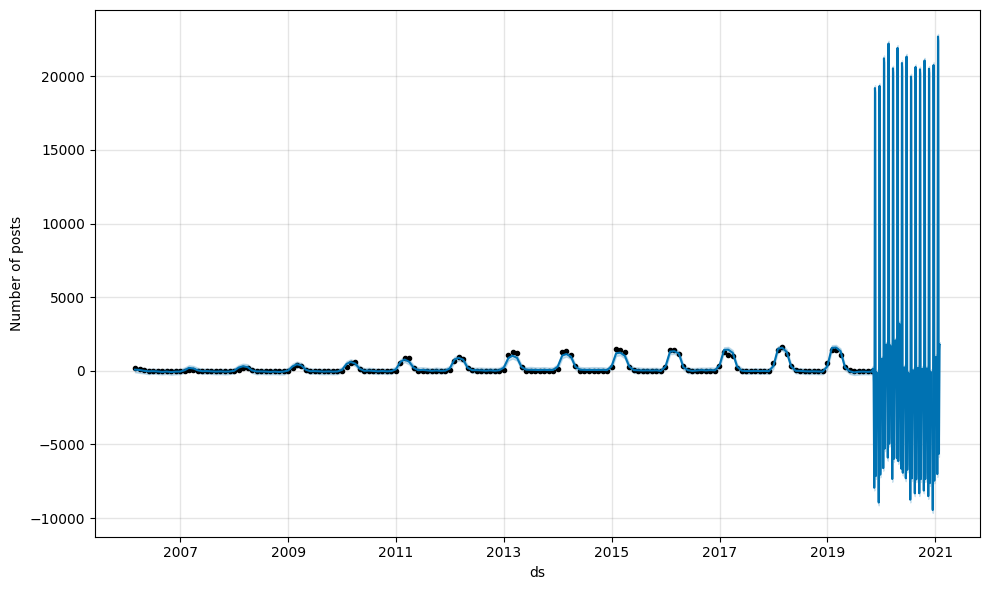

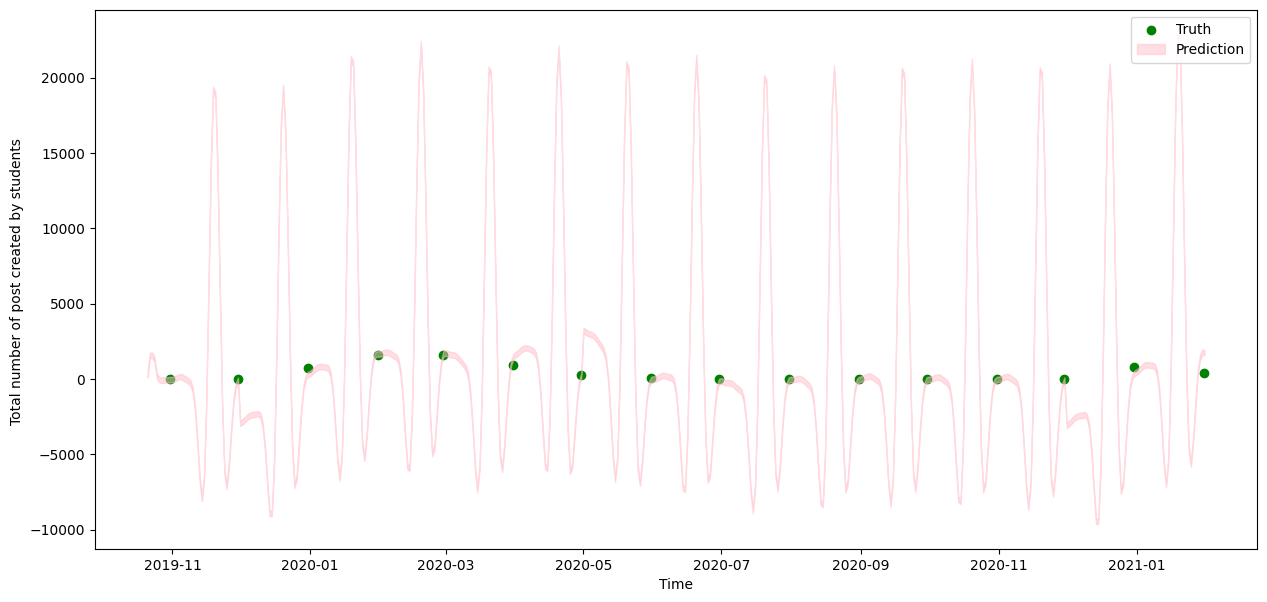

In [48]:
train_mon, test_mon = psydf[psydf.Date < datetime(2019, 10, 21)].groupby(pd.Grouper(key='Date', axis=0, freq='M')).size(), psydf[psydf.Date >= datetime(2019, 10, 21)].groupby(pd.Grouper(key='Date', axis=0, freq='M')).size()
m_mon, fcst_mon, fig_mon = prediction(train_mon,test_mon)
plotin(test_mon,fcst_mon)